# Exploratory Data Analysis (EDA) for Breast Cancer Dataset

This notebook performs comprehensive exploratory data analysis on the Wisconsin Breast Cancer Diagnostic dataset. We'll analyze:
1. Basic statistics and data quality
2. Feature distributions and relationships
3. Outlier detection
4. Statistical tests
5. Feature importance analysis
6. Data preprocessing suggestions

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import mutual_info_classif
import warnings

warnings.filterwarnings("ignore")

# Set style
plt.style.use("seaborn-v0_8-deep")
sns.set_palette("husl")

In [6]:
df.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

## 1. Data Loading and Initial Overview

In [5]:
# Fetch dataset
breast_cancer = fetch_ucirepo(id=17)

# Get features and target
X = breast_cancer.data.features
y = breast_cancer.data.targets

# Combine features and target
df = pd.concat([X, y], axis=1)

print("Dataset Shape:", df.shape)
print("\nFeature Names:")
print(X.columns.tolist())
print("\nTarget Variable:", y.columns[0])

Dataset Shape: (569, 31)

Feature Names:
['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']

Target Variable: Diagnosis


In [31]:
df[df["Diagnosis"] == "B"]

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,B
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,B
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,B
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,B


In [7]:
df.loc[
    1
    # [
    #     "radius1",
    #     "texture1",
    #     "perimeter1",
    #     "area1",
    #     "compactness1",
    #     "concavity1",
    #     "concave_points1",
    #     "radius2",
    #     "perimeter2",
    #     "area2",
    #     "concave_points2",
    #     "radius3",
    #     "texture3",
    #     "perimeter3",
    #     "area3",
    #     "smoothness3",
    #     "compactness3",
    #     "concavity3",
    #     "concave_points3",
    #     "symmetry3",
    # ],
].tolist()

[20.57,
 17.77,
 132.9,
 1326.0,
 0.08474,
 0.07864,
 0.0869,
 0.07017,
 0.1812,
 0.05667,
 0.5435,
 0.7339,
 3.398,
 74.08,
 0.005225,
 0.01308,
 0.0186,
 0.0134,
 0.01389,
 0.003532,
 24.99,
 23.41,
 158.8,
 1956.0,
 0.1238,
 0.1866,
 0.2416,
 0.186,
 0.275,
 0.08902,
 'M']

## 2. Basic Statistics and Data Quality

In [22]:
# Basic statistics
print("Basic Statistics:")
print(df.describe())

# Missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Data types
print("\nData Types:")
print(df.dtypes)

Basic Statistics:
          radius1    texture1  perimeter1        area1  smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096360   
std      3.524049    4.301036   24.298981   351.914129     0.014064   
min      6.981000    9.710000   43.790000   143.500000     0.052630   
25%     11.700000   16.170000   75.170000   420.300000     0.086370   
50%     13.370000   18.840000   86.240000   551.100000     0.095870   
75%     15.780000   21.800000  104.100000   782.700000     0.105300   
max     28.110000   39.280000  188.500000  2501.000000     0.163400   

       compactness1  concavity1  concave_points1   symmetry1  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.104341    0.088799         0.048919    0.181162   
std        0.052813    0.079720         0.038803    0.027414   
min        0.019380    0.000000         0.000000    0.106000   
25%        0.064920   

In [23]:
# Display numerical and categorical columns
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()

print("Numerical Features:")
print(numerical_features)
print(f"\nNumber of numerical features: {len(numerical_features)}")

print("\nCategorical Features:")
print(categorical_features)
print(f"\nNumber of categorical features: {len(categorical_features)}")

Numerical Features:
['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']

Number of numerical features: 30

Categorical Features:
['Diagnosis']

Number of categorical features: 1


## 3. Target Distribution Analysis

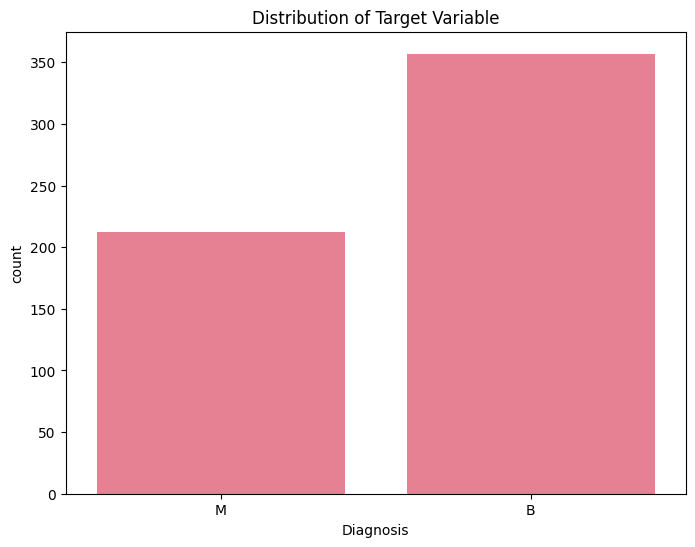


Class Distribution:
Diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64


In [24]:
# Target distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=y.columns[0])
plt.title("Distribution of Target Variable")
plt.show()

# Print class distribution
print("\nClass Distribution:")
print(df[y.columns[0]].value_counts(normalize=True))

## 4. Feature Distribution Analysis

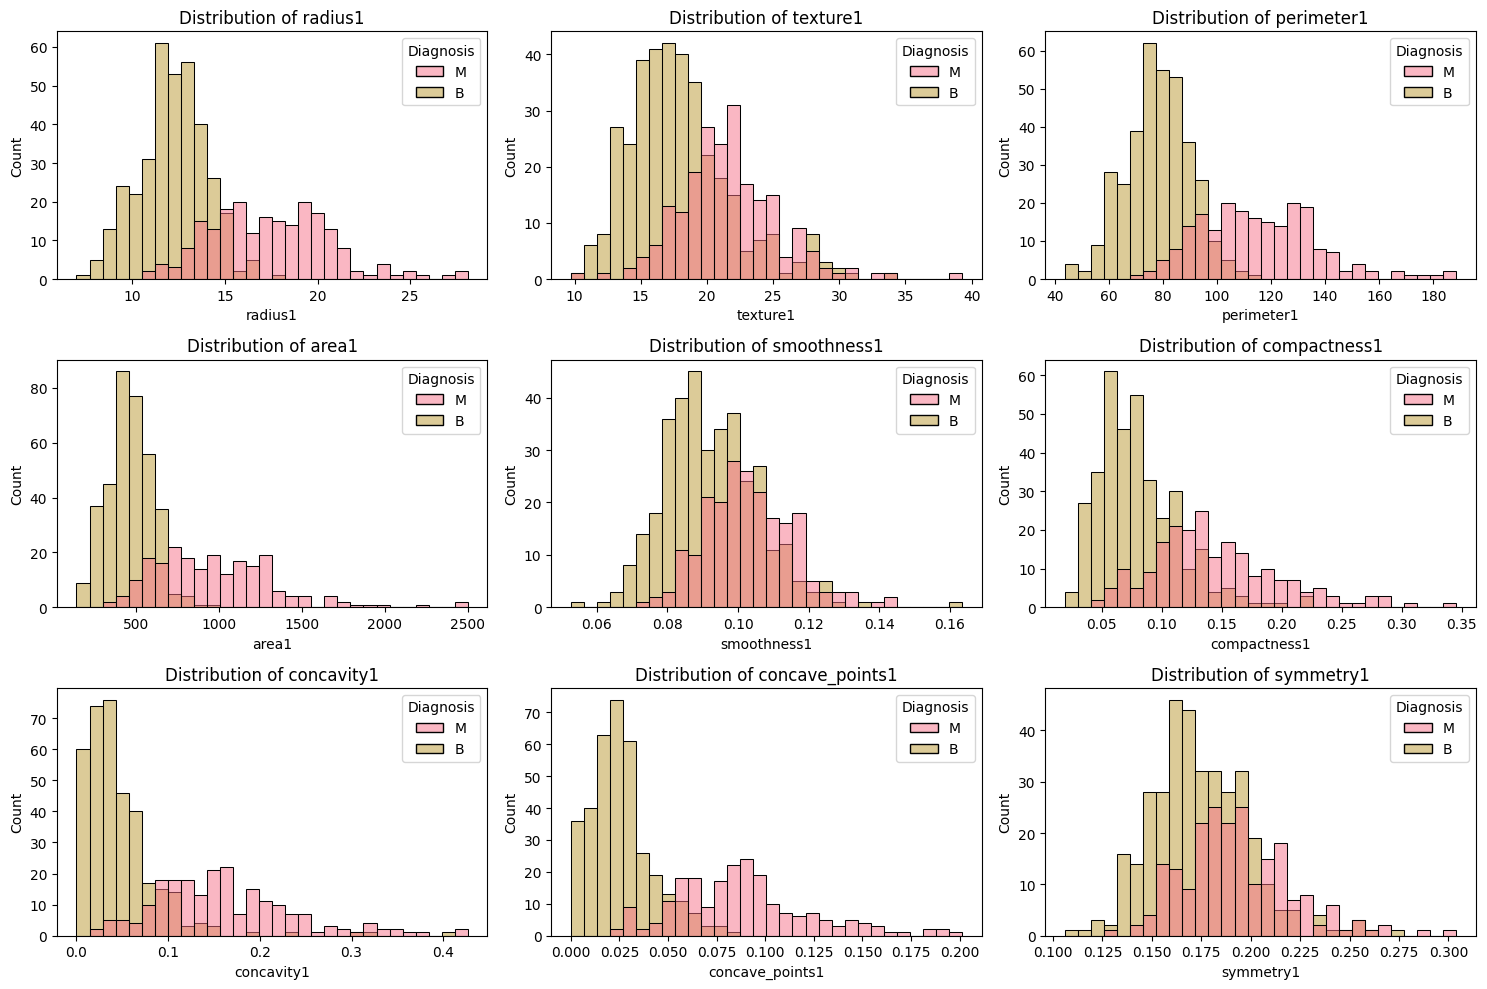

In [25]:
# Create distribution plots for first 9 features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(X.columns[:9]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df, x=feature, hue=y.columns[0], bins=30)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

## 5. Correlation Analysis

In [26]:
df["Diagnosis"] = df["Diagnosis"].map({"M": 1, "B": 0})
df["Diagnosis"].value_counts()

Diagnosis
0    357
1    212
Name: count, dtype: int64

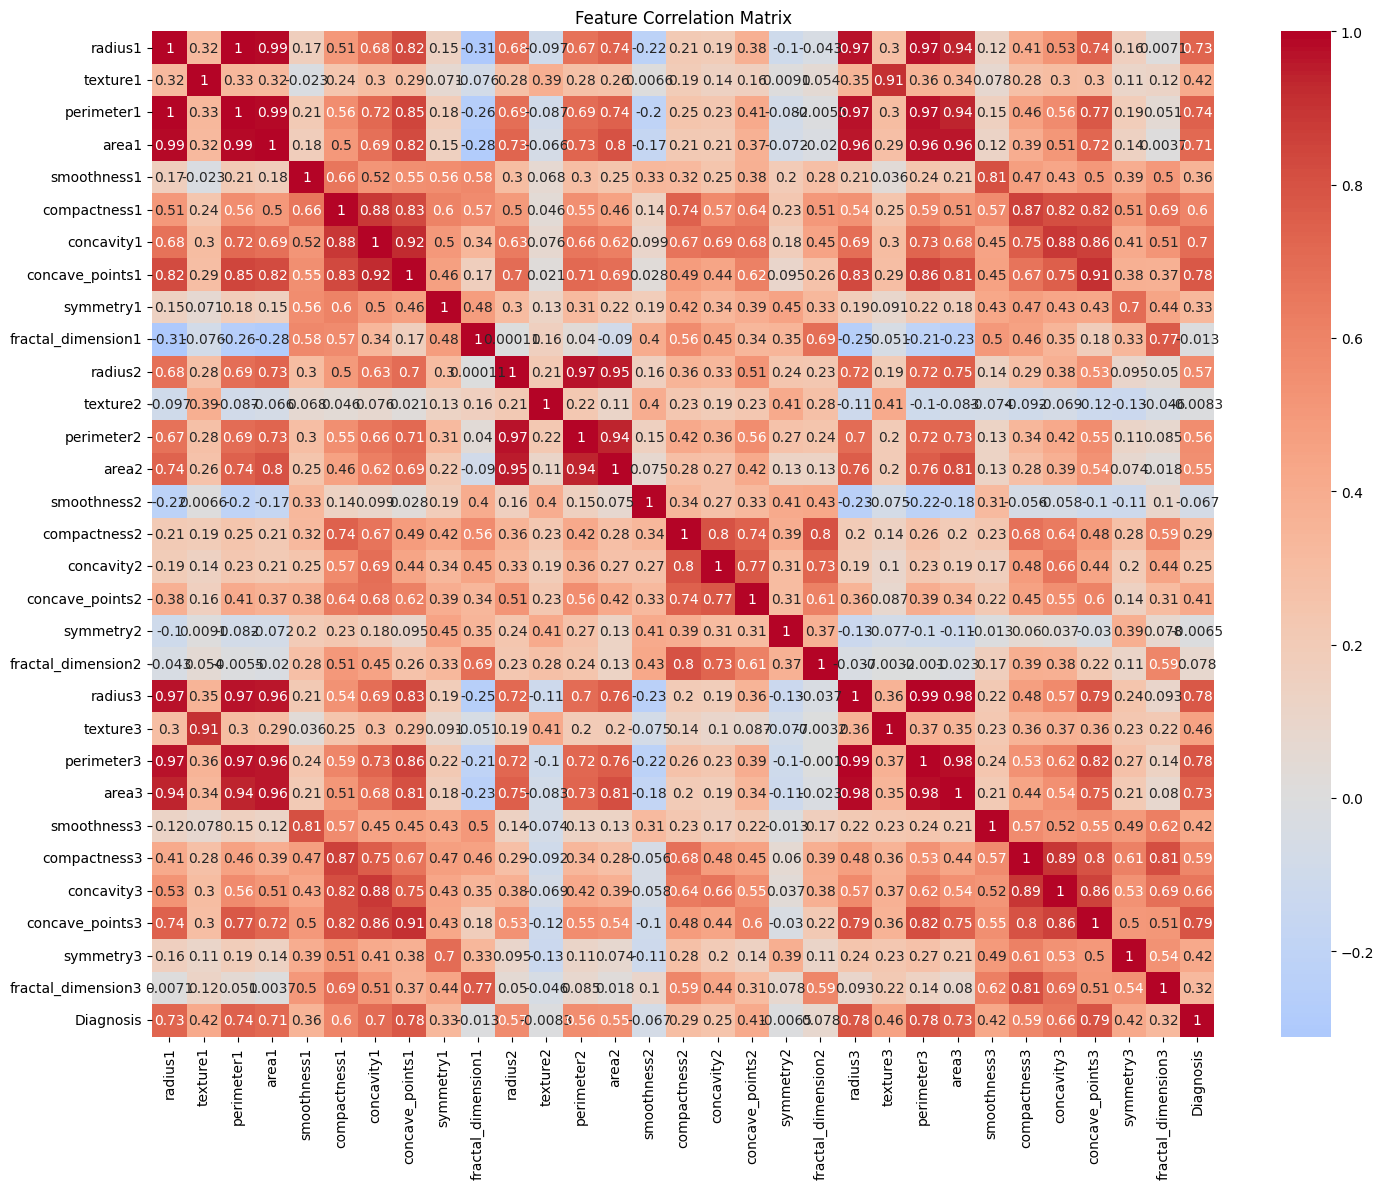


Correlations with Target:
Diagnosis             1.000000
concave_points3       0.793566
perimeter3            0.782914
concave_points1       0.776614
radius3               0.776454
perimeter1            0.742636
area3                 0.733825
radius1               0.730029
area1                 0.708984
concavity1            0.696360
concavity3            0.659610
compactness1          0.596534
compactness3          0.590998
radius2               0.567134
perimeter2            0.556141
area2                 0.548236
texture3              0.456903
smoothness3           0.421465
symmetry3             0.416294
texture1              0.415185
concave_points2       0.408042
smoothness1           0.358560
symmetry1             0.330499
fractal_dimension3    0.323872
compactness2          0.292999
concavity2            0.253730
fractal_dimension2    0.077972
symmetry2            -0.006522
texture2             -0.008303
fractal_dimension1   -0.012838
smoothness2          -0.067016
Name: Diagno

In [27]:
# Correlation matrix
plt.figure(figsize=(15, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

# Print correlations with target
print("\nCorrelations with Target:")
print(correlation_matrix[y.columns[0]].sort_values(ascending=False))

## 6. Outlier Detection

Number of outliers detected: 57


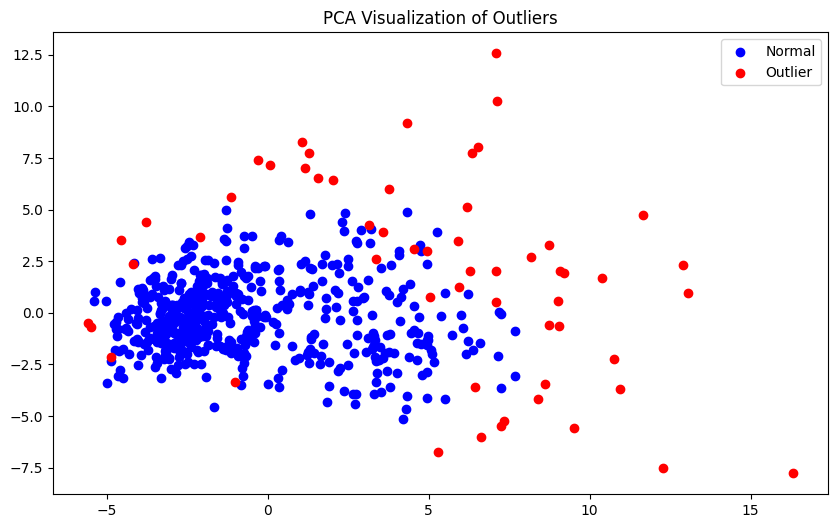

In [28]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use Isolation Forest for outlier detection
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers = iso_forest.fit_predict(X_scaled)

# Count outliers
n_outliers = (outliers == -1).sum()
print(f"Number of outliers detected: {n_outliers}")

# Visualize outliers using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[outliers == 1, 0], X_pca[outliers == 1, 1], c="blue", label="Normal")
plt.scatter(
    X_pca[outliers == -1, 0], X_pca[outliers == -1, 1], c="red", label="Outlier"
)
plt.title("PCA Visualization of Outliers")
plt.legend()
plt.show()

## 7. Statistical Tests

In [29]:
# Perform t-tests for each feature between classes
t_test_results = {}
for feature in X.columns:
    malignant = df[df[y.columns[0]] == 1][feature]
    benign = df[df[y.columns[0]] == 0][feature]
    t_stat, p_value = stats.ttest_ind(malignant, benign)
    t_test_results[feature] = {"t_statistic": t_stat, "p_value": p_value}

# Convert results to DataFrame
t_test_df = pd.DataFrame.from_dict(t_test_results, orient="index")
t_test_df["significant"] = t_test_df["p_value"] < 0.05

print("T-test Results:")
print(t_test_df.sort_values("p_value"))

T-test Results:
                    t_statistic        p_value  significant
concave_points3       31.054555  1.969100e-124         True
perimeter3            29.965717  5.771397e-119         True
concave_points1       29.354319  7.101150e-116         True
radius3               29.339082  8.482292e-116         True
perimeter1            26.405213  8.436251e-101         True
area3                 25.721590   2.828848e-97         True
radius1               25.435822   8.465941e-96         True
area1                 23.938687   4.734564e-88         True
concavity1            23.103963   9.966556e-84         True
concavity3            20.897175   2.464664e-72         True
compactness1          17.698392   3.938263e-56         True
compactness3          17.445374   7.069816e-55         True
radius2               16.396351   9.738949e-50         True
perimeter2            15.934158   1.651905e-47         True
area2                 15.609343   5.895521e-46         True
texture3              12

## 8. Feature Importance Analysis

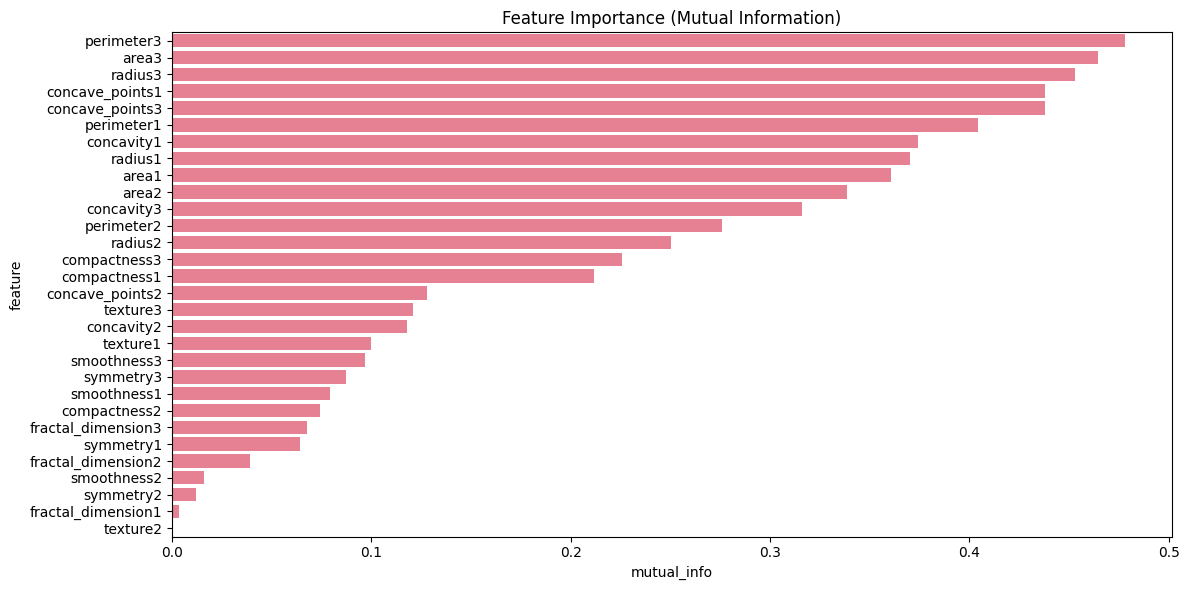


Top 10 Most Important Features:
            feature  mutual_info
22       perimeter3     0.477836
23            area3     0.464407
20          radius3     0.453040
7   concave_points1     0.438010
27  concave_points3     0.437999
2        perimeter1     0.404148
6        concavity1     0.373957
0           radius1     0.370178
3             area1     0.360519
13            area2     0.338785


In [30]:
# Calculate mutual information scores
mi_scores = mutual_info_classif(X, y.values.ravel())
mi_df = pd.DataFrame({"feature": X.columns, "mutual_info": mi_scores}).sort_values(
    "mutual_info", ascending=False
)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=mi_df, x="mutual_info", y="feature")
plt.title("Feature Importance (Mutual Information)")
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(mi_df.head(10))

## 9. Data Preprocessing Suggestions

Based on the analysis above, here are the suggested preprocessing steps:

1. **Feature Scaling**:
   - All features should be scaled using StandardScaler or RobustScaler
   - This is especially important due to the varying scales of features

2. **Feature Selection**:
   - Consider selecting top features based on mutual information scores
   - Remove highly correlated features to reduce multicollinearity

3. **Outlier Handling**:
   - Consider removing or treating outliers identified by Isolation Forest
   - Use robust scaling for features with many outliers

4. **Class Balance**:
   - The dataset is relatively balanced, but consider using class weights
   - Monitor for any class imbalance in cross-validation splits

5. **Feature Engineering**:
   - Consider creating interaction terms between highly correlated features
   - Create polynomial features for non-linear relationships

6. **Validation Strategy**:
   - Use stratified k-fold cross-validation
   - Implement proper train-test split with stratification